# The Secret Life of Pets in Real Life

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings

null_rate[null_rate > 0.5]

warnings.filterwarnings("ignore")

In [7]:
os.chdir("/Users/lydiawawa/Documents/Dat6202/Final/Final-Project-Group4/Code/Datasets/")
train = pd.read_csv("train.csv")

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB


In [8]:
train.describe(include="all")

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A719262,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


### Analyzing Missing 


In [83]:
null_rate =train.isnull().sum(axis = 0).sort_values(ascending = False)/float((len(train)))
null_rate[null_rate > 0.7]
null_rate[null_rate > 0.5]
null_rate[null_rate > 0.1]

Series([], dtype: float64)

OutcomeSubtype    0.50926
dtype: float64

OutcomeSubtype    0.50926
Name              0.28774
dtype: float64

***
There are over 50% of missing in OutcomeSubtype. Despite of it's missingness, the variable itself carries interesting characteristics that defines each animal, and may be useful for exploratory analysis. However, due to its unbalanced observations caused by missings, the variable will not be considered in modeling.

Another variable Name has about 30% missing, it will be redefined to 2 levels as have name vs no name.
***

*OutcomeSubtype Exploration*

In [54]:
train['OutcomeSubtype'].value_counts()
# Explore OutCome Subtype to Outcome
subTypeCross = pd.crosstab(train.OutcomeSubtype, train.OutcomeType)
# subTypeCross.reset_index(level=0, inplace=True)
subTypeCross
# SubType = subTypeCross.index.tolist()
# subTypeCross1 = subTypeCross.iloc[:,0:4] 
# subTypeCross1
# stacked = subTypeCross.stack ( ).reset_index ( ).rename (columns={0: 'Count'})
# stacked

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

OutcomeType,Adoption,Died,Euthanasia,Transfer
OutcomeSubtype,,,,
Aggressive,0,0,320,0
At Vet,0,4,0,0
Barn,1,0,0,1
Behavior,0,0,86,0
Court/Investigation,0,0,6,0
Enroute,0,8,0,0
Foster,1800,0,0,0
In Foster,0,52,0,0
In Kennel,0,114,0,0


In [84]:
# print(plt.style.available)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (11, 8)

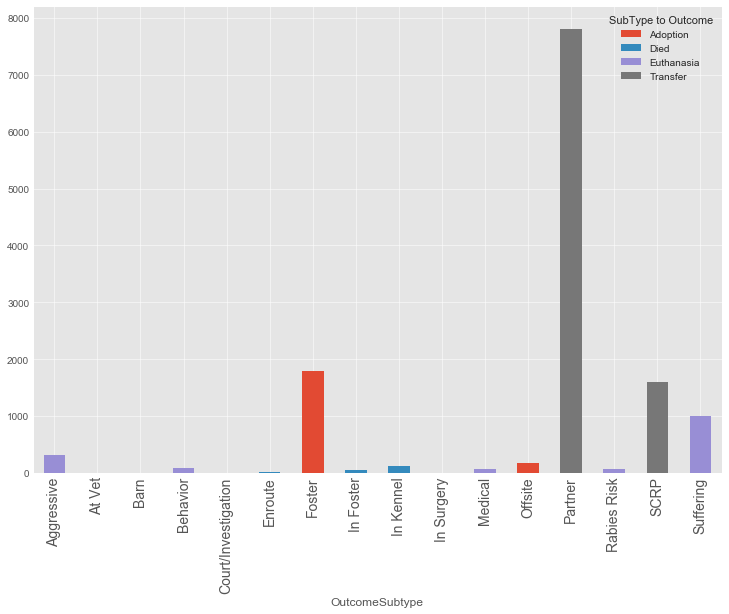

In [80]:
subTypeCross.plot.bar(stacked=True)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 14)

leg = ax.legend()
leg.set_title('SubType to Outcome',prop={'size':11})
plt.show()

***
From the graph, we can observe that an animal has a partner will be more likely to be transferred. Animals that are fostered are more likely to be adopted. 
***

### Feature Creation

<img src="/Final-Group-Presentation/VarName.png" alt="Title Image" width = 75% height = 85% >

### Exploratory Analysis

In [91]:
os.chdir("/Users/lydiawawa/Documents/Dat6202/Final/Final-Project-Group4/Code/Datasets/")

train1 = pd.read_csv("trainBigC.csv")
trainBig = pd.DataFrame(train1)

pets = pd.read_csv("trainK.csv")
pets = pd.DataFrame(pets)


pets.drop ('Aggressive', axis=1, inplace=True)
pets.drop ('At Vet', axis=1, inplace=True)
pets.drop ('Barn', axis=1, inplace=True)
pets.drop ('Behavior', axis=1, inplace=True)
pets.drop ('Court/Investigation', axis=1, inplace=True)
pets.drop ('Enroute', axis=1, inplace=True)
pets.drop ('Foster', axis=1, inplace=True)
pets.drop ('In Foster', axis=1, inplace=True)
pets.drop ('In Kennel', axis=1, inplace=True)
pets.drop ('In Surgery', axis=1, inplace=True)
pets.drop ('Medical', axis=1, inplace=True)
pets.drop ('Offsite', axis=1, inplace=True)
pets.drop ('Partner', axis=1, inplace=True)
pets.drop ('Rabies Risk', axis=1, inplace=True)
pets.drop ('SCRP', axis=1, inplace=True)
pets.drop ('Suffering', axis=1, inplace=True)
pets.drop ('AnimalID', axis=1, inplace=True)
pets.drop ('BreedName', axis=1, inplace=True)
pets.drop ('ageperiod', axis=1, inplace=True)
pets.drop ('outcome', axis=1, inplace=True)
pets.drop ('Target', axis=1, inplace=True)

trainBig['ageperiod'].replace ('year', 'years', inplace=True)
trainBig['ageperiod'].replace ('day', 'days', inplace=True)
trainBig['ageperiod'].replace ('month', 'months', inplace=True)
trainBig['ageperiod'].replace ('week', 'weeks', inplace=True)
trainBig['ageperiod'].replace ('year', 'years', inplace=True)
trainBig['ageperiod'].replace ('day', 'days', inplace=True)
trainBig['ageperiod'].replace ('month', 'months', inplace=True)
trainBig['ageperiod'].replace ('week', 'weeks', inplace=True)

pets.head()

,Main Breed,sex,fertility,MixColor,color,colorC,agenumber,age,ageC,MixBreed,animal,HaveName
0,181,0.0,1.0,1.0,Brown,3.0,1.0,365.0,1.0,1.0,1.0,1.0
1,80,1.0,1.0,0.0,Cream Tabby,16.0,1.0,365.0,1.0,1.0,2.0,1.0
2,159,0.0,1.0,1.0,Blue,6.0,2.0,730.0,2.0,1.0,1.0,1.0
3,80,0.0,0.0,0.0,Blue Cream,45.0,3.0,21.0,0.0,1.0,2.0,0.0
4,127,0.0,1.0,0.0,Tan,4.0,2.0,730.0,2.0,1.0,1.0,0.0


### Correlation

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

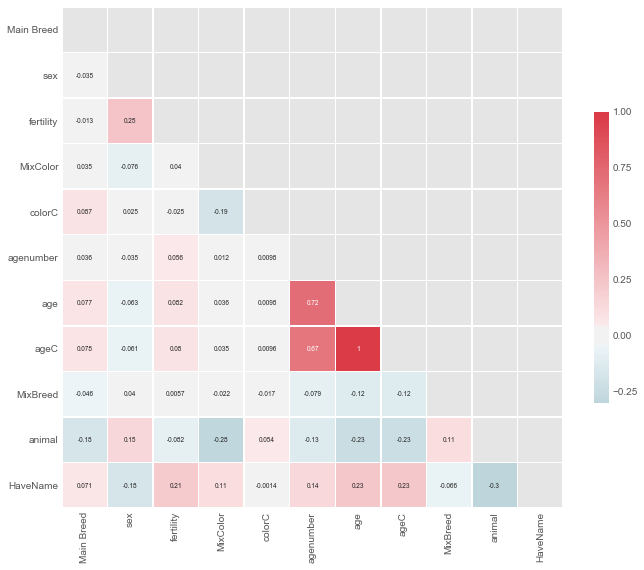

In [90]:


# Compute the correlation matrix
corr = pets.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation=90)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  cmap=cmap, vmin=corr.values.min(), vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
annot=True, annot_kws = {"size": 6.5})


***
This is only for reference purpose in case the need for dimension reduction. In a more disciplined scenario, peterson correlation should not be applied to categorical variables. 

Strong negatively correlated:
animal vs HaveName, age vs animal and MixColor vs animal

Strong positively correlated:
age vs HaveName and fertility vs HaveName

These are some relationships we can take in consideration in identifying interactions and colinearity. 
***

### Exploratory Analysis

In [95]:
# Explore variable impact to outcome
ct1 = pd.crosstab(trainBig.OutcomeType, trainBig.AnimalType)
ct2 = pd.crosstab(trainBig.OutcomeType, trainBig.SexuponOutcome)
ct3 = pd.crosstab(trainBig.OutcomeType, trainBig.ageperiod)
ct4 = pd.crosstab(trainBig.OutcomeType, trainBig.MixBreed)
ct5 = pd.crosstab(trainBig.OutcomeType, trainBig.HaveName)
ct6 = pd.crosstab(trainBig.OutcomeType, trainBig.fertility)
ct7 = pd.crosstab(trainBig.OutcomeType, trainBig.MixColor)
ct8 = pd.crosstab(trainBig.OutcomeType, trainBig.colorC)
# stacked = ct1.stack ( ).reset_index ( ).rename (columns={0: 'value'})
# sns.barplot(x=stacked.OutcomeType, y=stacked.value, hue=stacked.AnimalType)


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('legend',**{'fontsize':18})


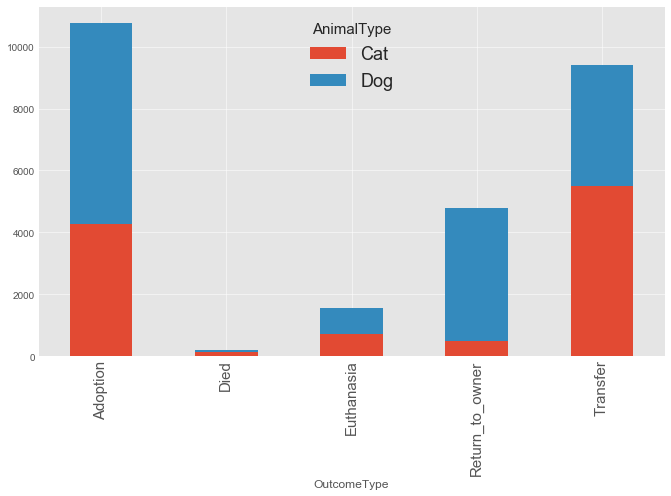

In [101]:
ct1.plot.bar(stacked=True)
# plt.legend(title='AnimalType')
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 15)
leg = ax.legend()
leg.set_title('AnimalType',prop={'size':15})
# plt.tick_params(labelsize=18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.show()

***
Animal types are evenly distributed by life expectancy outcomes. Therefore, by this trend it does not seems to be a determinant feature in outcome prediction.
***

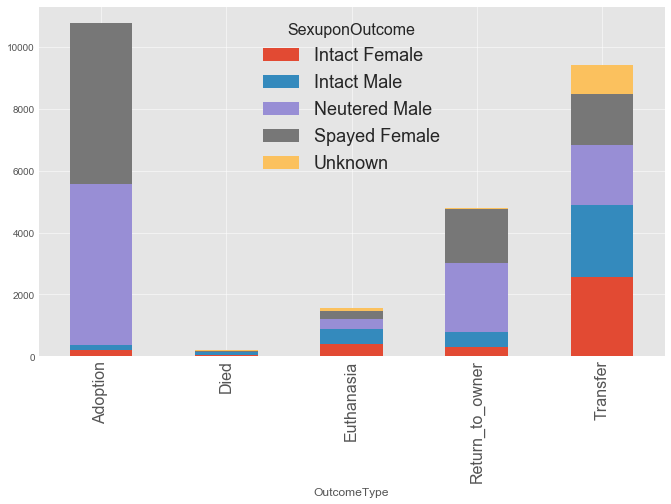

In [102]:
ct2.plot.bar(stacked=True)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
leg = ax.legend()
leg.set_title('SexuponOutcome',prop={'size':16})
plt.show()

***
Spayed Female and Neutered Male are predominantly more popular in the chance of survival. The ability to reproduce seems to be significant in determining survival outcome. Intact animals are way less favorable in adoption and more likely to be euthanized. Perhaps it is relevant to the origin of the animal, intact animals are more prone to be homeless before shelter.
***

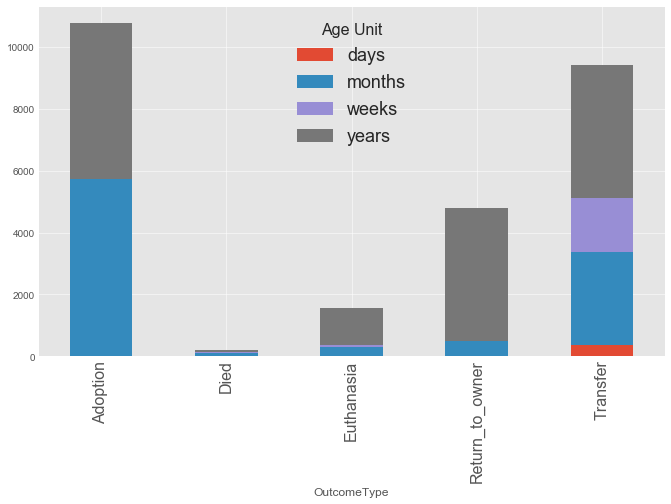

In [108]:
#Age by unit of time (year, month, week, day)

ct3.plot.bar(stacked=True)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
leg = ax.legend()
leg.set_title('Age Unit',prop={'size':16})
plt.show()


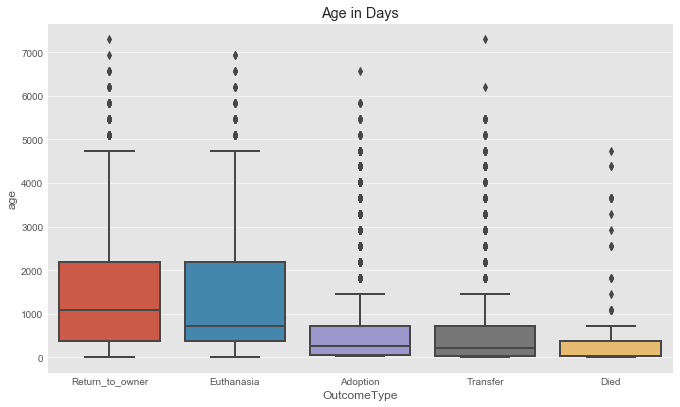

In [107]:
#Age boxplot

ax = sns.boxplot(x="OutcomeType", y="age", data=trainBig).set_title('Age in Days')

plt.show()


***
First we have to note the color notation of the first graph does not represent the second graph. 

The likelihood of survival is more skewed towards younger groups with animals in Age Unit, year, being the predominant group in the Euthanasia category. Age in this case could be an important feature. However, the difference in age groups may not be singular enough to make the feature significant, such as for age unit age, it dominates across outcomes not just Euthanasia. An interesting pattern of animals born in unit of weeks is observed in Transfer, but this outcome category is not primary in this study purpose. 
***

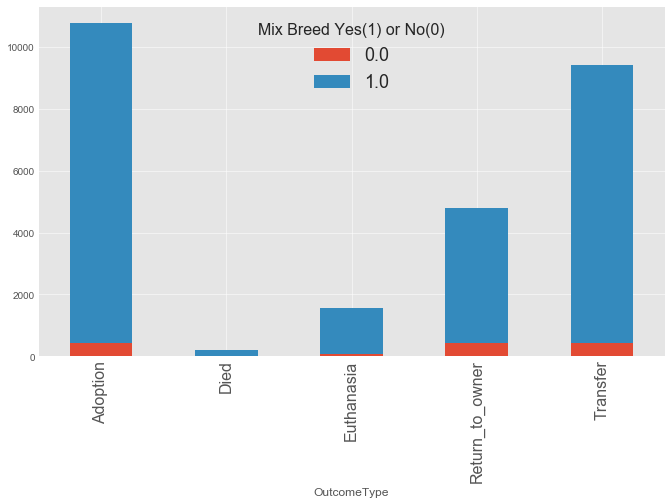

In [112]:
ct4.plot.bar(stacked=True)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
leg = ax.legend()
leg.set_title('Mix Breed Yes(1) or No(0)',prop={'size':16})
plt.show()

***
Most animals in the shelter are mixed breed, which common especially in shelter animals. We could also infer that pure breeds are less likely to become unwanted due to their popularity for being scarce in generated and being wanted in the breeding market. 
***

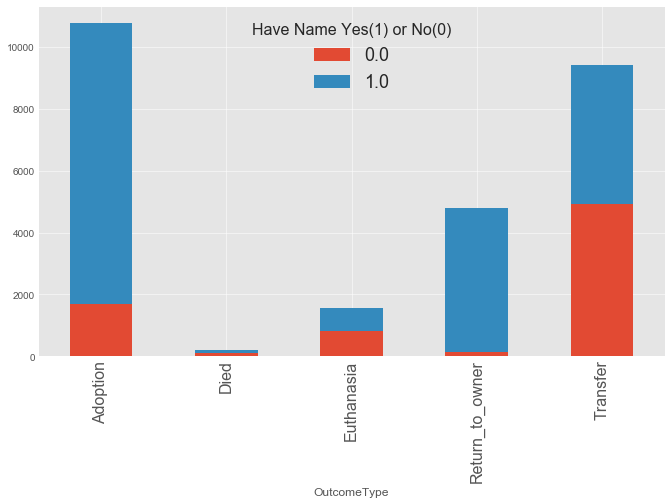

In [111]:
ct5.plot.bar(stacked=True)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
leg = ax.legend()
leg.set_title('Have Name Yes(1) or No(0)',prop={'size':16})
plt.show()

***
Animals with a name certainly are more likely in adoption. However it is not the dominant factor in being euthanized. 
***

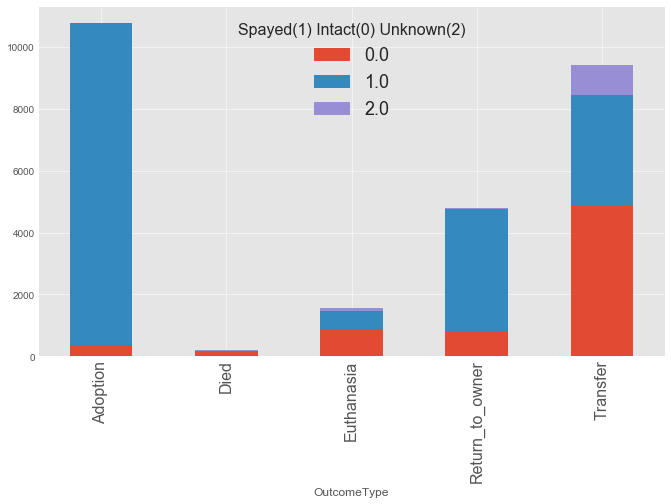

In [116]:
#Fertility
ct6.plot.bar(stacked=True)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
leg = ax.legend()
leg.set_title('Spayed(1) Intact(0) Unknown(2)',prop={'size':16})
plt.show()

***
Referring back to the Sex upon Outcome graph on previous page, the trend re-appeared in fertility that spayed animals are far more likely to be adopted. However, interestingly it is not the determinant factor in euthanasia. 
***

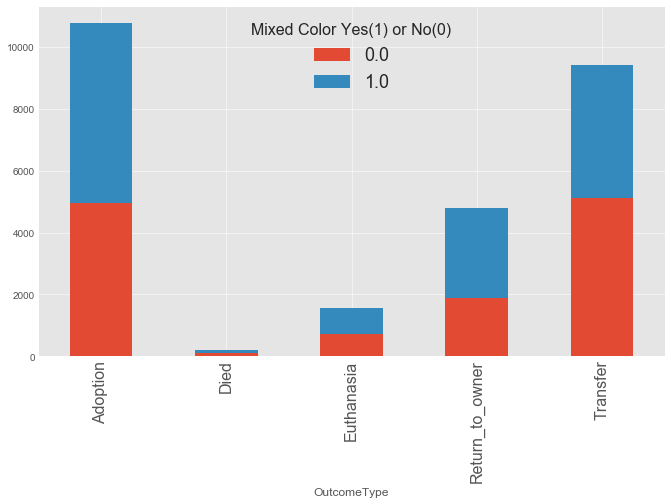

In [115]:
#Mix Color
ct7.plot.bar(stacked=True)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
leg = ax.legend()
leg.set_title('Mixed Color Yes(1) or No(0)',prop={'size':16})
plt.show()

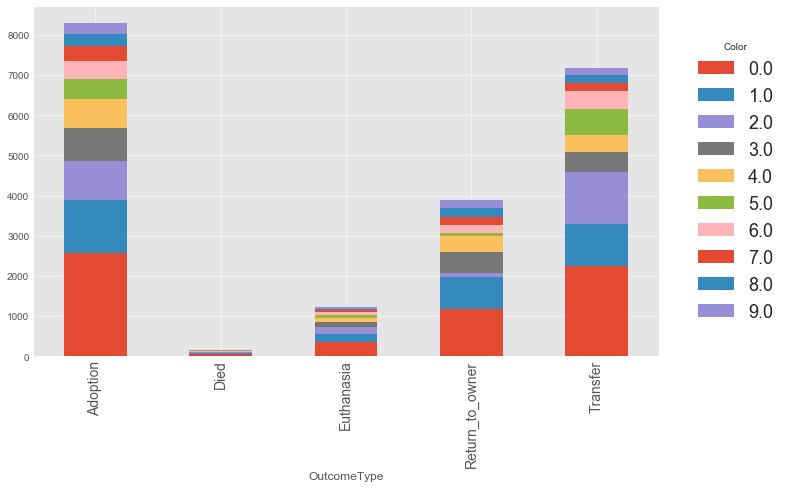

In [119]:
#By Color

ct9 = ct8.iloc[0:10,0:10]
ct9.plot.bar(stacked=True)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 14)
leg = ax.legend()
leg.set_title('Color',prop={'size':16})
plt.legend(title="Color",loc="center left",bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)
plt.show()

In [120]:
ct9

colorC,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
OutcomeType,,,,,,,,,,
Adoption,2581,1298,984,809,722,513,454,354,305,276
Died,51,18,37,7,6,15,6,0,3,6
Euthanasia,365,195,157,124,100,80,93,25,37,58
Return_to_owner,1167,798,99,525,413,62,196,210,233,187
Transfer,2254,1034,1310,486,433,629,449,211,201,172


***
Being mixed color does not impact types of outcome. However, having color black(0) drives up the frequency in Euthanasia. This could be a trend caused by the already predominant Black colored animal in shelters, which infers that black / dark colored animals are more prone to be unwanted and almost double as more likely to be euthanized. 
***